In [32]:
#Importing personal libraries. @code and library source Dr. Richard Huntsinger.
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)                                                     
update_geom_defaults("point", list(size=0.01, colour=PALETTE[1]))
update_geom_defaults("vline", list(color="black", size=0.15))

.................................................... start of document ....................................................

In [82]:
data = read.csv('loan.csv') #Data source Kaggle
#head(data[,1:20])

# Analyzing loan applicant risk to classify if it is a good loan or bad loan from past 2007-2015 data. 
## Steps on processing the dataset for exploratory purpose
 1. Geting rid of missing values columns
 2. Just keeping the loans that are inactive
 3. Keeping the variables with numeric properties
 4. Removing any duplicates observation
 5. Droping columns that has variance less than 1
 6. Rearranging data table rows from good loans to bad loans

In [34]:
#Loan labels that we are intrested for out analysis
good_labels = c("Fully Paid", "Does not meet the credit policy. Status:Fully Paid")
bad_labels  = c("Default", "Charged Off", "Does not meet the credit policy. Status:Charged Off")
inactive.good = which(data$loan_status %in% good_labels)
inactive.bad = which(data$loan_status %in% bad_labels)
inactive = c(inactive.good, inactive.bad)
class = c(rep("good", length(inactive.good)), rep("bad", length(inactive.bad)))

In [35]:
m = which(!(colnames(data) %in% c("id","member_id")))
m

[1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145

In [36]:
n = which(var_info.type(data[inactive,]) %in% c("integer","numeric"))                  
n

[1]   3   4   5   7   8  14  25  26  28  29  30  31  32  33  34  35  37  38
 [19]  39  40  41  42  43  44  45  47  50  51  52  54  55  57  58  59  60  61
 [37]  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
 [55]  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
 [73]  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116
 [91] 117 118 119 120 121 122 127 128 132 133 135 136 137 143 144 145

In [37]:
f = which(var_info.na_count(data[inactive,],label=FALSE) == 0)
f

[1]   3   4   5   6   7   8   9  10  12  13  15  16  17  18  20  21  23  24  27
[20]  33  36  37  38  39  40  41  42  43  44  45  46  47  48  49  52  53  56 113
[39] 123 124 125 126 129 130 131 134 138 139 140 141 142

In [38]:
v = which(var_info.unique(data[inactive,],label = FALSE) > 1)
v

[1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  20  21  22
 [19]  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
 [37]  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56  57  58  59
 [55]  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
 [73]  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
 [91]  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
[109] 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
[127] 132 133 134 135 136 137 138 139 140 141 142 143 144 145

In [42]:
keep_variable  = intersect(intersect(m, n), intersect(f, v))
keep_variable

[1]  3  4  5  7  8 33 37 38 39 40 41 42 43 44 45 47

In [43]:
data  = data[inactive, keep_variable]

ERROR: Error in `[.data.frame`(data, inactive, keep_variable): undefined columns selected


In [21]:
#new_data = data[,keep_variable]
#write.csv(data,"filtered_loan.csv")
data = read.csv('filtered_loan.csv')

In [45]:
data = data[,2:17]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,30000,30000,30000,22.35,1151.16,15603,0,0,30026.443,30026.44,30000,26.44,0,0,0,30082.32
153,40000,40000,40000,16.14,975.71,34971,0,0,40856.679,40856.68,40000,856.68,0,0,0,40910.48
171,20000,20000,20000,7.56,622.68,25416,0,0,20215.792,20215.79,20000,215.79,0,0,0,20228.39
187,4500,4500,4500,11.31,147.99,4472,0,0,4549.217,4549.22,4500,49.22,0,0,0,4553.46
216,8425,8425,8425,27.27,345.18,36812,0,0,8735.149,8735.15,8425,310.15,0,0,0,8754.30
270,20000,20000,20000,17.97,507.55,33356,0,0,20013.577,20013.58,20000,13.58,0,0,0,20043.53


In [46]:
head(data)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,30000,30000,30000,22.35,1151.16,15603,0,0,30026.443,30026.44,30000,26.44,0,0,0,30082.32
153,40000,40000,40000,16.14,975.71,34971,0,0,40856.679,40856.68,40000,856.68,0,0,0,40910.48
171,20000,20000,20000,7.56,622.68,25416,0,0,20215.792,20215.79,20000,215.79,0,0,0,20228.39
187,4500,4500,4500,11.31,147.99,4472,0,0,4549.217,4549.22,4500,49.22,0,0,0,4553.46
216,8425,8425,8425,27.27,345.18,36812,0,0,8735.149,8735.15,8425,310.15,0,0,0,8754.30
270,20000,20000,20000,17.97,507.55,33356,0,0,20013.577,20013.58,20000,13.58,0,0,0,20043.53


In [47]:
sdev = var_info.sd(data, labels=FALSE)
variance = var_info.var(data, labels=FALSE)
cum_variance = cumsum(variance)
stat_data = data.frame(variable = colnames(data),
                      sd = sdev,
                      variance = variance,
                      cumilative_variance = cum_variance,
                      relative_variance = variance/sum(variance))
stat_data

variable,sd,variance,cumilative_variance,relative_variance
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
loan_amnt,8698.613361,75665874.39615,75665874,0.07000754140748
funded_amnt,8694.589186,75595881.10476,151261756,0.06994278225040
funded_amnt_inv,8700.952295,75706570.83350,226968326,0.07004519454432
int_rate,4.757423,22.63307,226968349,0.00000002094056
installment,261.047148,68145.61369,227036495,0.00006304964966
revol_bal,22440.875670,503592900.82512,730629395,0.46593396479429
out_prncp,71.759899,5149.48304,730634545,0.00000476440205
out_prncp_inv,71.759899,5149.48304,730639694,0.00000476440205
total_pymnt,10326.163736,106629657.49504,837269352,0.09865583688713


## Exploratory steps
  1. Observing the variance across all columns 
  2. Observing the distribution of variable using kernel distribution
  3. Try to use PDF to estimate on which side of the curve does good and bad loan falls


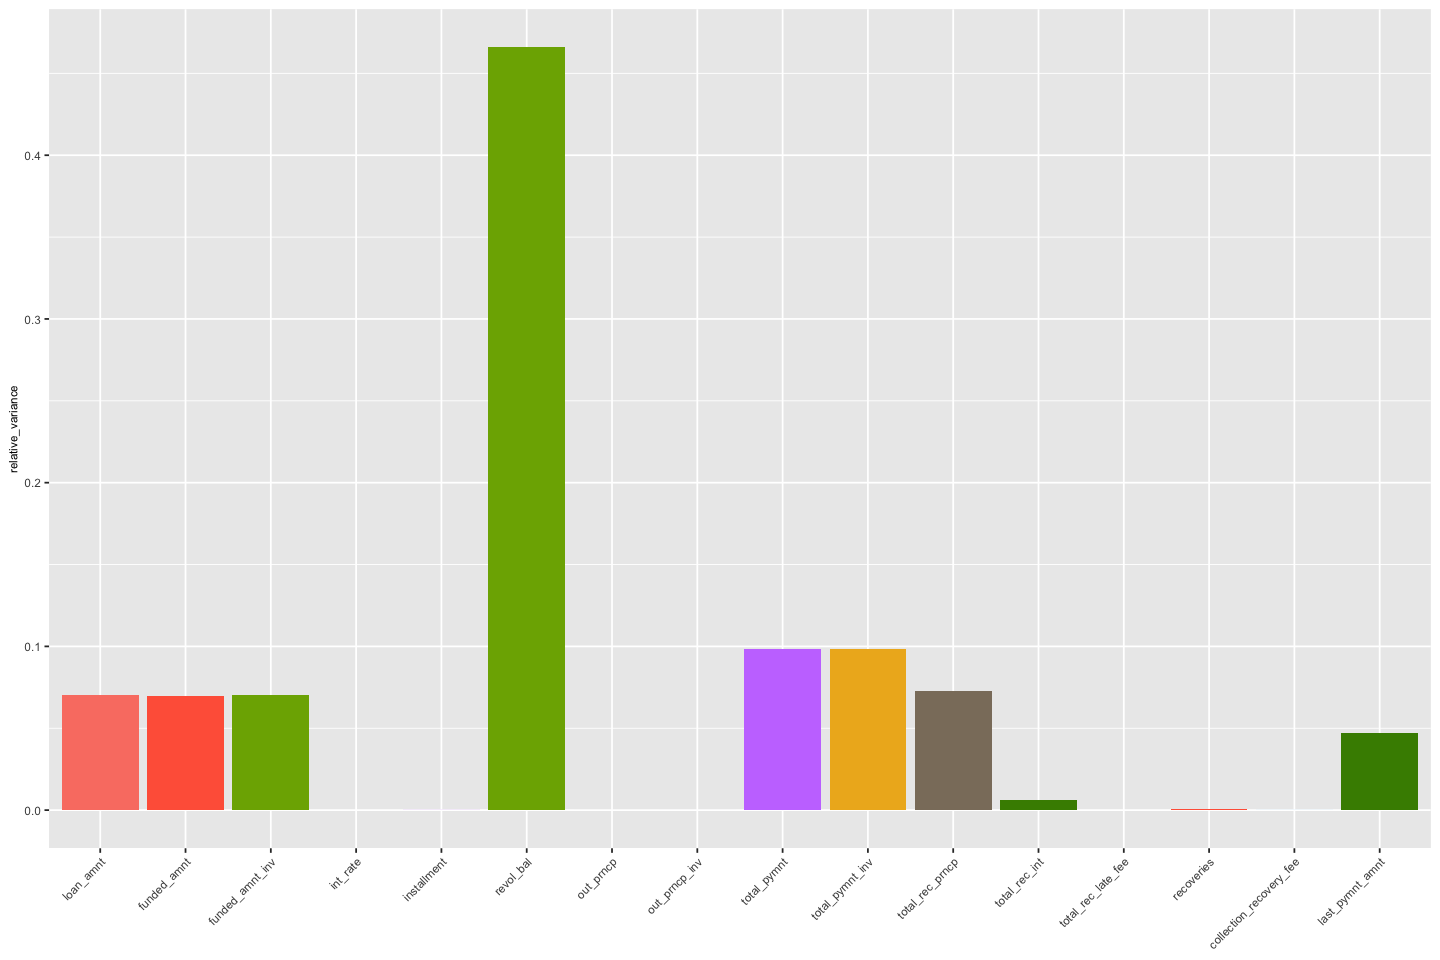

In [48]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(stat_data) +
geom_col(aes(x=factor(variable, levels=variable), y=relative_variance, fill=variable)) +
theme.no_x_axis_title + theme.x_axis_45 + theme.no_legend
dev.new(width=5, height=4)

### Plotting 1D scatter plot of interest rate and loan amount

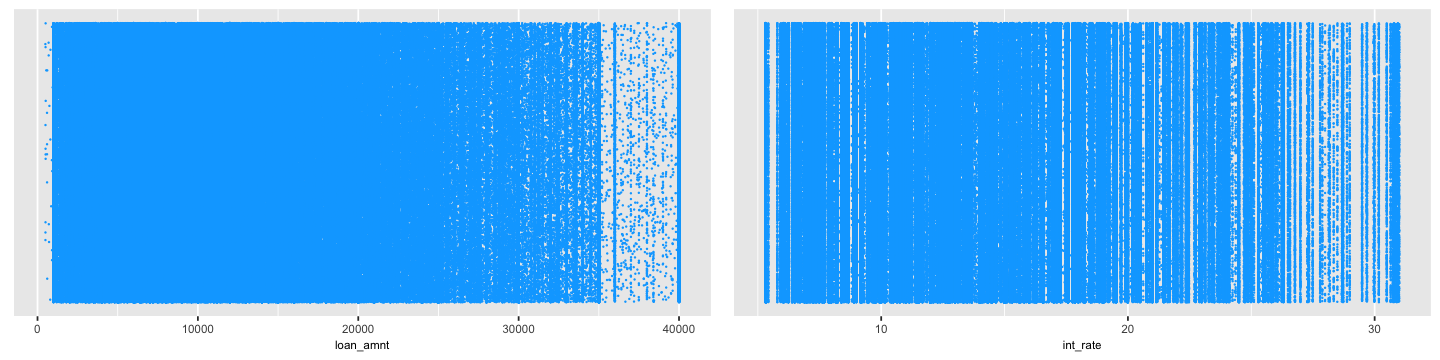

In [49]:
output_size(12,3)
p1 = ggplot(data) + geom_jitter(aes(x=loan_amnt, y=0)) + theme.x_axis_only
p2 = ggplot(data) + geom_jitter(aes(x=int_rate, y=0))  + theme.x_axis_only
grid.arrange(p1, p2, nrow=1)
output_size(restore)

### Using kernel density estimation to estimate probability densities in above variables to see if we can estimate Good loan vs Bad Loans

In [50]:
size(data)

observations,variables
<int>,<int>
1306387,16


In [ ]:
output_size(14,6)
p1 = ggplot(data) + ggtitle("PDF for loan_amnt") +
     geom_density(aes(x=loan_amnt), kernel="gaussian", bw=1000, fill=PALETTE[1]) +
     theme.no_axis_titles

p2 = ggplot(data) + ggtitle("PDF for int_rate") +
     geom_density(aes(x=int_rate), kernel="gaussian", bw=0.5, fill=PALETTE[1]) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

In [ ]:
loan_amnt = density(data$loan_amnt[class=="good"], kernel="gaussian", bw=1000, from=0, to=40000)
int_rate  = density(data$int_rate[class=="good"],  kernel="gaussian", bw=0.5,  from=0, to=30)

pdf.loan_amnt = approxfun(loan_amnt)
pdf.int_rate = approxfun(int_rate)

data.frame(variable=c("loan_amnt","int_rate"),
           probability=c(integrate(pdf.loan_amnt, 0, 18000)$value, integrate(pdf.int_rate, 10, 20)$value),
           range_low=c(0, 10),
           range_high=c(18000, 20))

p1 = ggplot(data[class=="good",]) + xlim(0, 40000) + ggtitle("PDF for loan_amnt") +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, xlim=c(0,18000), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=18000) +
     theme.no_axis_titles

p2 = ggplot(data[class=="good",]) + xlim(0, 30) + ggtitle("PDF for int_rate") +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, xlim=c(10,20), fill=PALETTE[5]) +
     geom_vline(xintercept=10) + geom_vline(xintercept=20) +
     theme.no_axis_titles
output_size(14,6)
grid.arrange(p1, p2, nrow=1)

In [ ]:
d.loan_amnt = density(data$loan_amnt[class=="bad"], kernel="gaussian", bw=1000, from=0, to=40000)
d.int_rate  = density(data$int_rate[class=="bad"],  kernel="gaussian", bw=0.5,  from=0, to=30)

pdf.loan_amnt = approxfun(d.loan_amnt)
pdf.int_rate = approxfun(d.int_rate)

data.frame(variable=c("loan_amnt","int_rate"),
           probability=c(integrate(pdf.loan_amnt, 0, 18000)$value, integrate(pdf.int_rate, 10, 20)$value),
           range_low=c(0, 10),
           range_high=c(18000, 20))

p1 = ggplot(data[class=="bad",]) + xlim(0, 40000) + ggtitle("PDF for loan_amnt") +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, xlim=c(0,18000), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=18000) +
     theme.no_axis_titles

p2 = ggplot(data[class=="bad",]) + xlim(0, 30) + ggtitle("PDF for int_rate") +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, xlim=c(10,20), fill=PALETTE[5]) +
     geom_vline(xintercept=10) + geom_vline(xintercept=20) +
     theme.no_axis_titles
output_size(14,6)
grid.arrange(p1, p2, nrow=1)

In [ ]:
output_size(12,8)
ggplot(data) +
geom_point(aes(x=loan_amnt, y=int_rate, color=class), alpha=0.2) +
scale_color_manual(values=PALETTE[2:3]) + guides.standard + theme.legend_title

## Observation
When estimating as you can see good and bad loan are distributed almost equally on same side and hence it is impossible ot distinguis by just looking at the density curve above. We will tackle this problem by running some further Analysis 

## PCA steps
We will run PCA to see if we can find any patterns by reducing dimenstion to just two variables and see if we can distinguis a good loan from a bad loan given all the 17 features

In [51]:
pc = prcomp(data, scale=TRUE, retx=TRUE)
data.pc = as.data.frame(pc$x)

size(data.pc)
fmt(data.pc[1:6,], "First 6 PC and few observations ...", position="left")

observations,variables
<int>,<int>
1306387,16


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
-5.198003,0.8365302,0.0030696,0.1503511,1.3213026,0.9827541,-3.0179287,1.2476742,0.8395435,0.5218935,-0.0122437,-0.0076462,0.0053667,0.0014068,0.0000002,0
-7.769007,1.6738101,0.0040692,-1.2258387,0.9982057,1.1638899,-3.4068848,0.2655100,-0.0874086,-0.6727018,0.0378384,0.0124089,-0.0044295,-0.0006016,-0.0000001,0
-1.806297,1.2274340,0.0040644,-1.6548790,-0.0088236,0.7458362,-1.2621684,-0.0240491,-0.3371194,0.2250426,-0.0134457,-0.0055863,0.0011178,0.0005523,0.0000002,0
2.959427,0.4575371,0.0030641,-0.1592490,0.1087503,0.2725316,-0.2944831,-0.2159395,-0.1236224,0.0644683,-0.0030791,-0.0042357,0.0001534,0.0001042,-0.0000002,0
1.234449,-0.1752491,-0.0012737,1.5885970,0.8193762,-1.6353515,-2.1167159,0.4734341,0.8784354,-0.0709134,0.0191601,-0.0022318,0.0007814,0.0002708,-0.0000001,0
-1.794037,0.7675883,0.0017950,-0.2381208,0.5694409,-0.1849698,-2.1985428,0.2121896,0.2497477,-0.4205841,0.0277162,0.0052001,-0.0024715,-0.0002635,-0.0000002,0


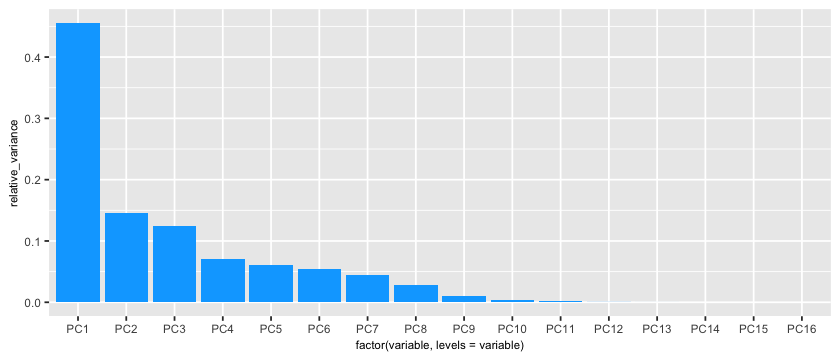

In [52]:
sddev_data = data.frame(variable = colnames(pc$x),
           variance = pc$sdev^2,
            relative_variance =pc$sdev^2/sum(pc$sdev^2) )
ggplot(sddev_data)+
geom_bar(aes(x = factor(variable, levels=variable),y = relative_variance),stat = "identity")

## Observation
As you can see the scree plot above most of the variance are captured by first two principle components, hence we will use these two components to see if we can find any patterns or boundaries to distinguis good loan and bad loan

In [ ]:
## d.PC1 = density(data.pc$PC1[class=="good"], kernel="gaussian", bw=0.2, from=-5, to=5)
d.PC2 = density(data.pc$PC2[class=="good"], kernel="gaussian", bw=0.2, from=-5, to=5)

pdf.PC1 = approxfun(d.PC1)
pdf.PC2 = approxfun(d.PC2)

data.frame(variable=c("PC1","PC2"),
           probability=c(integrate(pdf.PC1, -5, 0)$value, integrate(pdf.PC2, 0, 2)$value),
           range_low=c(-5, 0),
           range_high=c(0, 2))

p1 = ggplot(data.pc[class=="good",]) + xlim(-5, 5) + ggtitle("PDF for PC1") +
     stat_function(fun=pdf.PC1, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.PC1, geom="area", n=2000, xlim=c(-5,0), fill=PALETTE[5]) +
     geom_vline(xintercept=-5) + geom_vline(xintercept=0) +
     theme.no_axis_titles

p2 = ggplot(data.pc[class=="good",]) + xlim(-5, 5) + ggtitle("PDF for PC2") +
     stat_function(fun=pdf.PC2, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.PC2, geom="area", n=2000, xlim=c(0,2), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=2) +
     theme.no_axis_titles
output_size(14,6)
grid.arrange(p1, p2, nrow=1)

variable,probability,range_low,range_high
<fct>,<dbl>,<dbl>,<dbl>
PC1,0.3187071,-5,0
PC2,0.1089879,0,2


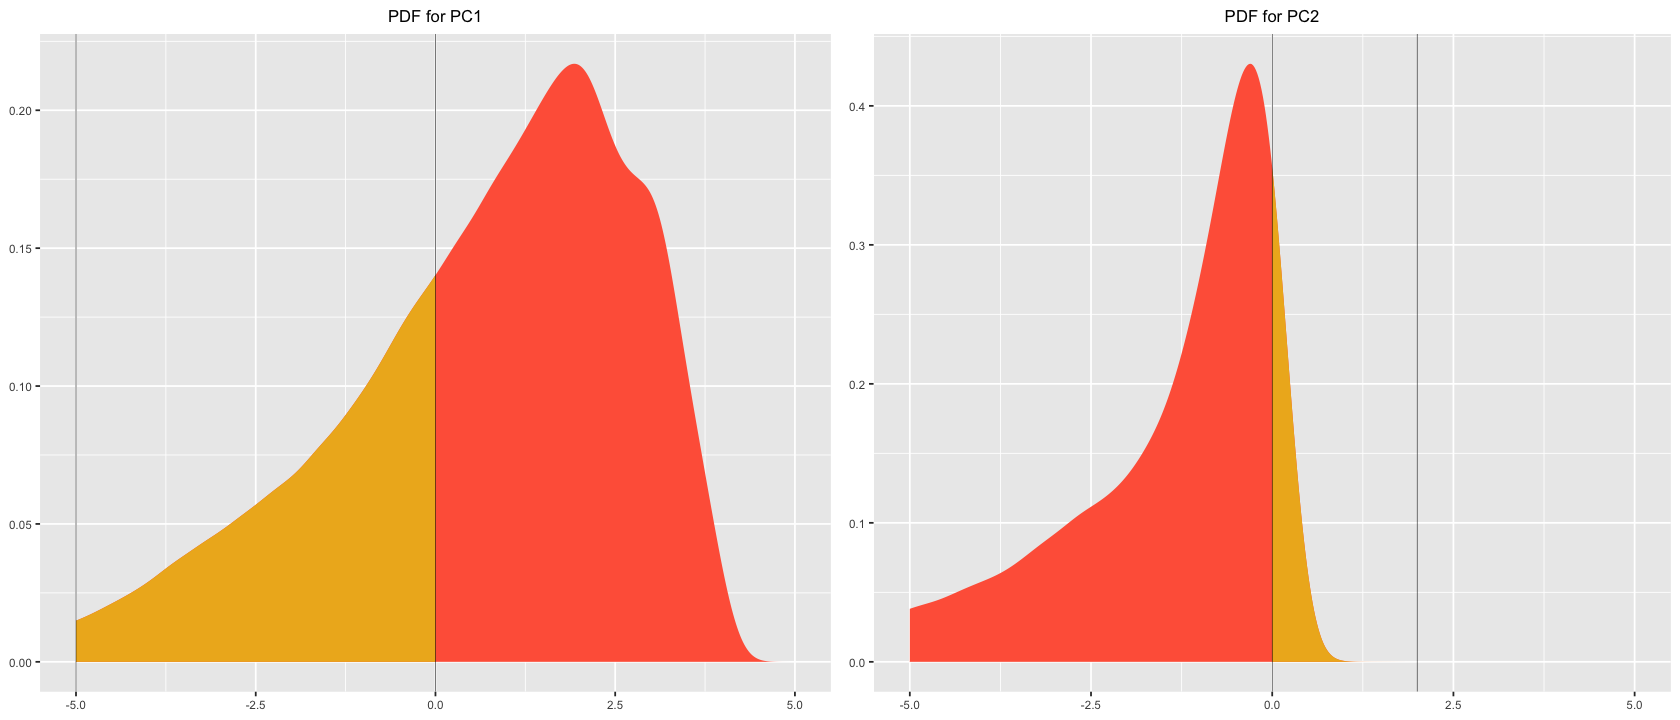

In [54]:
d.PC1 = density(data.pc$PC1[class=="bad"], kernel="gaussian", bw=0.2, from=-5, to=5)
d.PC2 = density(data.pc$PC2[class=="bad"], kernel="gaussian", bw=0.2, from=-5, to=5)

pdf.PC1 = approxfun(d.PC1)
pdf.PC2 = approxfun(d.PC2)

data.frame(variable=c("PC1","PC2"),
           probability=c(integrate(pdf.PC1, -5, 0)$value, integrate(pdf.PC2, 0, 2)$value),
           range_low=c(-5, 0),
           range_high=c(0, 2))

p1 = ggplot(data.pc[class=="bad",]) + xlim(-5, 5) + ggtitle("PDF for PC1") +
     stat_function(fun=pdf.PC1, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.PC1, geom="area", n=2000, xlim=c(-5,0), fill=PALETTE[5]) +
     geom_vline(xintercept=-5) + geom_vline(xintercept=0) +
     theme.no_axis_titles

p2 = ggplot(data.pc[class=="bad",]) + xlim(-5, 5) + ggtitle("PDF for PC2") +
     stat_function(fun=pdf.PC2, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.PC2, geom="area", n=2000, xlim=c(0,2), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=2) +
     theme.no_axis_titles
output_size(14,6)
grid.arrange(p1, p2, nrow=1)

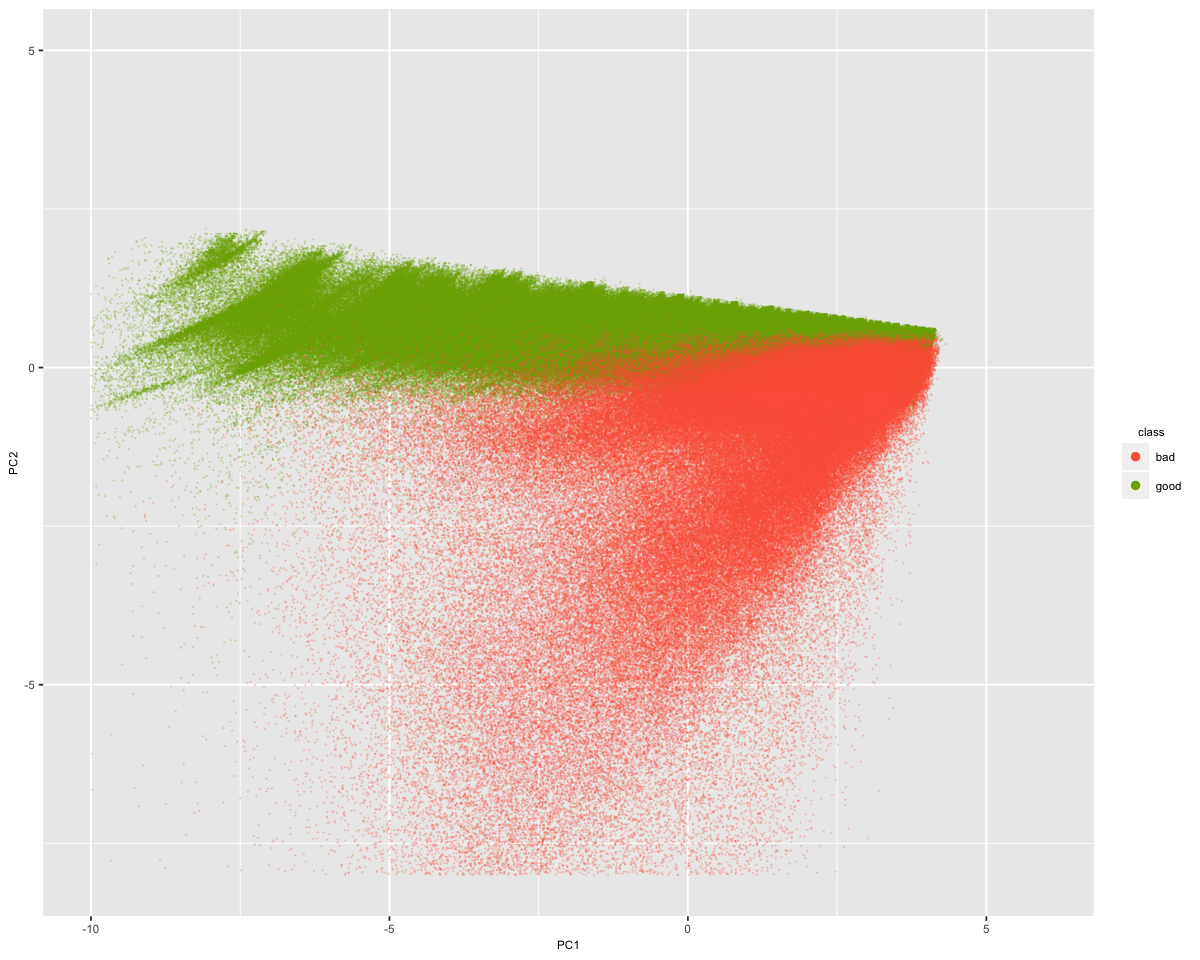

In [55]:
output_size(10,8)
ggplot(data.pc) + xlim(-10,6) + ylim(-8,5) +
geom_point(aes(x=PC1, y=PC2, color=class), alpha=0.2, na.rm=TRUE) +
scale_color_manual(values=PALETTE[2:3]) + guides.standard + theme.legend_title

## Observation
As you can see from the kernel density above that there is now certain probability that we can use to distinguish which side of the curve on PC1 and PC2 falls good loan and bad loan. Further more if we look at the scatter plot of PC1 and PC2, Beside the point where they overlap, we can clearly draw a boundary line between PC1 and PC2 to distinguish good loan from bad loan. And for the part where they intersect, we can use other different decision making method allowing certain threshold to classify around those region.

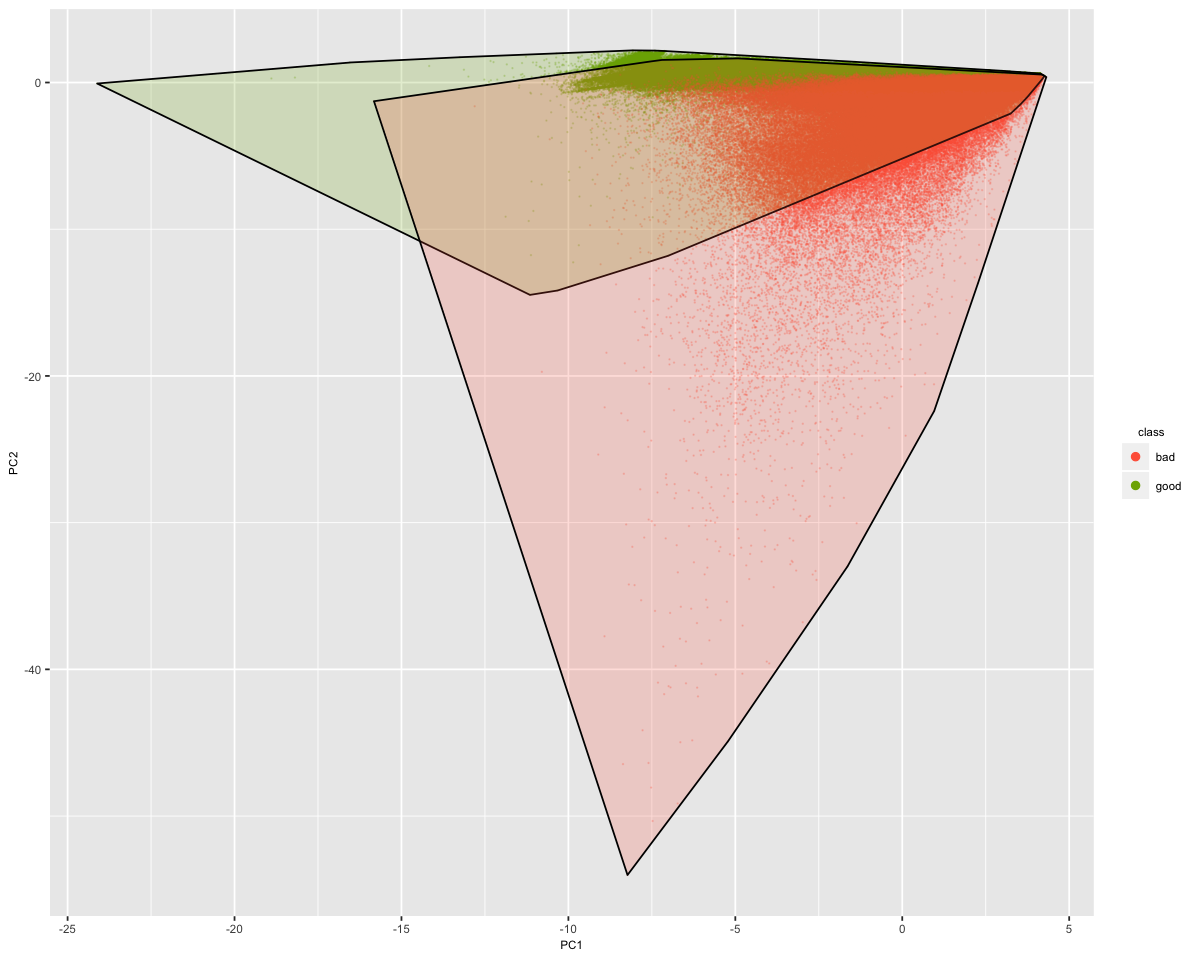

In [56]:
convex_hull.good = data.pc[class=="good", c("PC1","PC2")][chull(data.pc$PC1[class=="good"], data.pc$PC2[class=="good"]),]
convex_hull.bad  = data.pc[class=="bad",  c("PC1","PC2")][chull(data.pc$PC1[class=="bad"],  data.pc$PC2[class=="bad"]),]

ggplot(data.pc) + 
geom_point(aes(x=PC1, y=PC2, color=class), alpha=0.2) +
geom_polygon(aes(x=PC1, y=PC2), data=convex_hull.good, fill=PALETTE[3], color="black", alpha=0.2) +
geom_polygon(aes(x=PC1, y=PC2), data=convex_hull.bad,  fill=PALETTE[2], color="black", alpha=0.2) +
scale_color_manual(values=PALETTE[2:3]) + guides.standard + theme.legend_title